In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Dataset and Data Cleaning

In [2]:
# Import Seasons_Stats.csv
players = pd.read_csv('Seasons_Stats.csv',sep=',')

In [3]:
# Analyze information of players
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24624 entries, 0 to 24623
Data columns (total 56 columns):
Num          24624 non-null int64
Season       24624 non-null int64
Player       24624 non-null object
Pos          24624 non-null object
Age          24616 non-null float64
Tm           24624 non-null object
G            24624 non-null int64
GS           18233 non-null float64
MP           24138 non-null float64
PER          24101 non-null float64
TS%          24538 non-null float64
3PAr         18839 non-null float64
FTr          24525 non-null float64
ORB%         20792 non-null float64
DRB%         20792 non-null float64
TRB%         21571 non-null float64
AST%         22555 non-null float64
STL%         20792 non-null float64
BLK%         20792 non-null float64
TOV%         19582 non-null float64
USG%         19640 non-null float64
blanl        0 non-null float64
OWS          24585 non-null float64
DWS          24585 non-null float64
WS           24585 non-null float64
WS/4

In [4]:
#Deduct Players before 1980-1981 season 
#Voting system is different before 1980-1981 season
players = players.drop(players.index[:6054])

In [5]:
#Deduct whose playing time less than 2050 Minutes, as well as 25 mins per game
#Do not care players with too low playing time
players = players[(players['MP'] > 2050)]
players.reset_index(inplace=True, drop=True)

In [6]:
miss_rate_players = players.isnull().sum()/len(players)
miss_rate_players

Num          0.000000
Season       0.000000
Player       0.000000
Pos          0.000000
Age          0.000000
Tm           0.000000
G            0.000000
GS           0.024191
MP           0.000000
PER          0.000000
TS%          0.000000
3PAr         0.000000
FTr          0.000000
ORB%         0.000000
DRB%         0.000000
TRB%         0.000000
AST%         0.000000
STL%         0.000000
BLK%         0.000000
TOV%         0.000000
USG%         0.000000
blanl        1.000000
OWS          0.000000
DWS          0.000000
WS           0.000000
WS/48        0.000000
blank2       1.000000
OBPM         0.000000
DBPM         0.000000
BPM          0.000000
VORP         0.000000
FG           0.000000
FGA          0.000000
FG%          0.000000
3P           0.000000
3PA          0.000000
3P%          0.043035
2P           0.000000
2PA          0.000000
2P%          0.000000
eFG%         0.000000
FT           0.000000
FTA          0.000000
FT%          0.000000
ORB          0.000000
DRB       

In [7]:
#Drop features with more than 25% missing values
#Drop 'VoteWon' and 'VoteMax' because they can be represented by VoteShare
#Drop 'Pos' because MVP voting does not distinguish between position of players
#Drop 'GS' because we only care the minutes play rather than if ther were start-up
features_missing_series = players.isnull().sum() > len(players)*0.25
features_missing_series = features_missing_series[features_missing_series == True]
features_missing_list =  features_missing_series.index.tolist()
players = players.drop(features_missing_list, axis=1)
players_clean = players.drop(['Num','Pos','VoteWon','VoteMax','GS'], axis=1)

In [8]:
players_clean.head(5)

,Season,Player,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,VoteShare
0,1980,Kareem Abdul-Jabbar*,33.0,LAL,80,2976.0,25.5,0.616,0.001,0.379,...,197.0,624.0,821.0,272,59.0,228.0,249.0,244,2095,0.414493
1,1980,Alvan Adams,26.0,PHO,75,2054.0,20.3,0.567,0.000,0.298,...,157.0,389.0,546.0,344,106.0,69.0,226.0,226,1115,0.000000
2,1980,Tiny Archibald*,32.0,BOS,80,2820.0,14.3,0.582,0.012,0.547,...,36.0,140.0,176.0,618,75.0,18.0,265.0,201,1106,0.046377
3,1980,James Bailey,23.0,SEA,82,2539.0,14.5,0.546,0.002,0.406,...,192.0,415.0,607.0,98,74.0,143.0,219.0,332,1145,0.000000
4,1980,Greg Ballard,26.0,WSB,82,2610.0,16.7,0.500,0.027,0.165,...,167.0,413.0,580.0,195,118.0,39.0,117.0,194,1271,0.000000


In [9]:
#import Team_Records.csv
team = pd.read_csv('Team_Records.csv',sep=',')

In [10]:
team.head(5)

,Season,Lg,Tm,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs,Coaches,Top WS
0,2017,NBA,BOS,29,10,0.744,1,4.38,95.4,-1.7,108.0,0.2,102.8,-5.0,NaN,B. Stevens (29-10),K. Irving?(5.7)
1,2016,NBA,BOS,53,29,0.646,1,2.25,96.8,0.4,111.2,2.4,108.4,-0.4,Lost E. Conf. Finals,B. Stevens (53-29),I. Thomas?(12.5)
2,2015,NBA,BOS,48,34,0.585,2,2.84,98.5,2.7,106.8,0.4,103.6,-2.8,Lost E. Conf. 1st Rnd.,B. Stevens (48-34),I. Thomas?(9.7)
3,2014,NBA,BOS,40,42,0.488,2,-0.40,95.8,1.9,104.7,-0.9,104.5,-1.1,Lost E. Conf. 1st Rnd.,B. Stevens (40-42),T. Zeller?(6.5)
4,2013,NBA,BOS,25,57,0.305,4,-4.97,93.3,-0.6,102.9,-3.8,107.7,1.0,NaN,B. Stevens (25-57),B. Bass?(5.1)


In [11]:
#Drop features, we only want to know the W/L% of teams
team_clean = team.drop(['Lg','Finish','SRS','Pace','Rel_Pace','ORtg','Rel_ORtg','DRtg','Rel_DRtg','Playoffs','Coaches','Top WS','W','L'], axis=1)

In [12]:
team_clean.head(5)

,Season,Tm,W/L%
0,2017,BOS,0.744
1,2016,BOS,0.646
2,2015,BOS,0.585
3,2014,BOS,0.488
4,2013,BOS,0.305


In [13]:
#No missing in the W/L%
miss_rate_team = team_clean.isnull().sum()/len(team_clean)
miss_rate_team

Season    0.0
Tm        0.0
W/L%      0.0
dtype: float64

In [14]:
#Combine two dataset as data_raw and set all missing data equal 0
data_raw = pd.merge(players_clean, team_clean[['Season', 'Tm', 'W/L%']], 
                    left_on=['Season','Tm'], right_on=['Season','Tm'], right_index=False,
      how='left', sort=False).fillna(value=0)
data_raw.reset_index(inplace=True, drop=True)

#We do not need 'Tm' feature because we have W/L% of every team
data_raw = data_raw.drop(['Tm'], axis=1)

In [15]:
#Define MVPRATE,PPG,APG,3PG,RPG,FTPG,TOPG,MVP
MVPRATE=0.6
data_raw["PPG"] = data_raw["PTS"] /data_raw["G"]
data_raw["APG"] = data_raw["AST"] / data_raw["G"]
data_raw["3PG"] = data_raw["3P"] / data_raw["G"]
data_raw["RPG"] = data_raw["TRB"] / data_raw["G"]
data_raw["FTPG"] = data_raw["FTA"] / data_raw["G"]
data_raw["TOPG"] = data_raw["TOV"] / data_raw["G"]
data_raw["MVP"] = 0
data_raw["MVP"][data_raw['VoteShare']>MVPRATE]=1


C:\Users\yipan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [16]:
#the new dataset after data cleaning and combining
data_raw.head(5)

,Season,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,...,PTS,VoteShare,W/L%,PPG,APG,3PG,RPG,FTPG,TOPG,MVP
0,1980,Kareem Abdul-Jabbar*,33.0,80,2976.0,25.5,0.616,0.001,0.379,7.6,...,2095,0.414493,0.659,26.187500,3.400000,0.000000,10.262500,6.900000,3.112500,0
1,1980,Alvan Adams,26.0,75,2054.0,20.3,0.567,0.000,0.298,8.6,...,1115,0.000000,0.695,14.866667,4.586667,0.000000,7.280000,3.453333,3.013333,0
2,1980,Tiny Archibald*,32.0,80,2820.0,14.3,0.582,0.012,0.547,1.5,...,1106,0.046377,0.756,13.825000,7.725000,0.000000,2.200000,5.237500,3.312500,0
3,1980,James Bailey,23.0,82,2539.0,14.5,0.546,0.002,0.406,8.5,...,1145,0.000000,0.415,13.963415,1.195122,0.012195,7.402439,4.402439,2.670732,0
4,1980,Greg Ballard,26.0,82,2610.0,16.7,0.500,0.027,0.165,6.7,...,1271,0.000000,0.476,15.500000,2.378049,0.085366,7.073171,2.390244,1.426829,0


In [17]:
#figure the datatype of our combining dataset

data_raw.dtypes.value_counts()

float64    43
int64      12
object      1
dtype: int64

# Finding Important Features

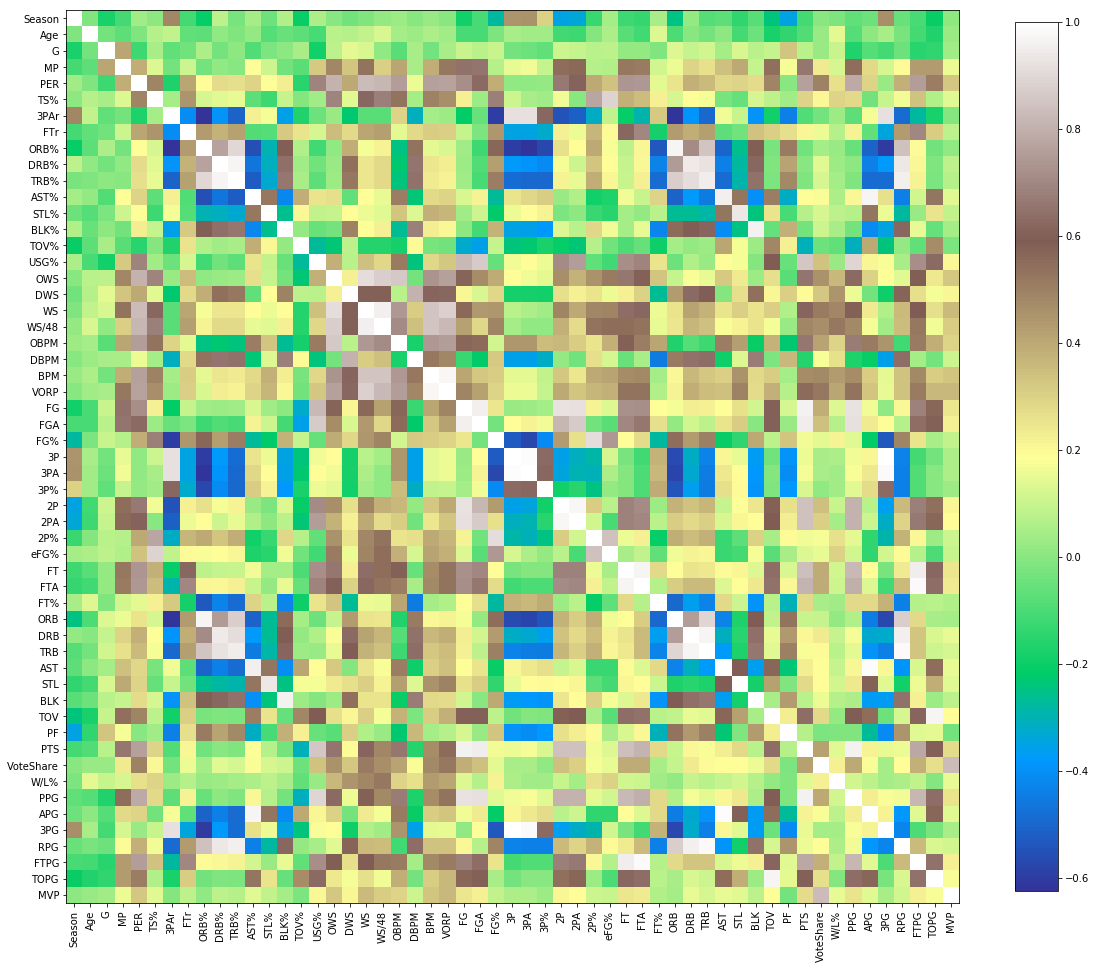

In [18]:
#plot the correlation map between every features
fig, ax = plt.subplots(1,1, figsize = (20,20))
heatmap = ax.imshow(data_raw.corr(),
                   cmap='terrain',
                   interpolation='nearest')
plt.xticks(range(data_raw.corr().shape[1]), data_raw.corr().columns, rotation=90)
plt.yticks(range(data_raw.corr().shape[1]), data_raw.corr().index)

plt.colorbar(heatmap, shrink=0.8);

 1) WS                             0.100581
 2) VORP                           0.075795
 3) WS/48                          0.075174
 4) BPM                            0.056179
 5) PER                            0.051631
 6) W/L%                           0.051558
 7) OWS                            0.042888
 8) OBPM                           0.026978
 9) PTS                            0.024890
10) DWS                            0.018494
11) PPG                            0.018289
12) FG                             0.017097
13) FGA                            0.016892
14) AST                            0.016360
15) APG                            0.015732
16) AST%                           0.014457
17) 2PA                            0.013941
18) DBPM                           0.013653
19) USG%                           0.013251
20) TOPG                           0.013033
21) TOV                            0.012922
22) FTA                            0.012719
23) FT%                         

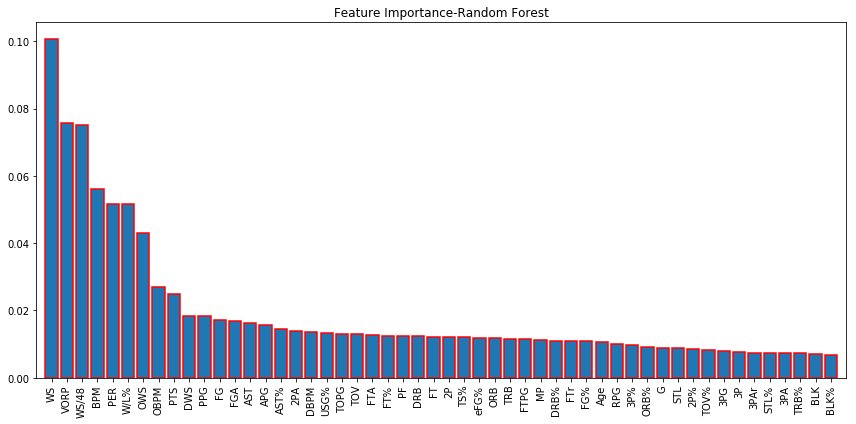

In [19]:
#find the importance of features by random forest method
data_raaw = data_raw.drop(['VoteShare'], axis=1)
A, B = data_raaw.iloc[:, 2:-1].values, data_raaw.iloc[:, -1].values
from sklearn.ensemble import RandomForestClassifier

feat_labels = data_raaw.columns[2:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(A, B)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(A.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.figure(num=1, figsize=(12, 6)) 
plt.title('Feature Importance-Random Forest')
plt.bar(range(A.shape[1]), 
        importances[indices],
        align='center',
        #width=0.6,
        ec='r', ls='-', lw=1.5)
plt.xticks(range(A.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, A.shape[1]])
plt.tight_layout()
plt.show()

In [20]:
#Grab the features we want to use
data_new = data_raw[['Season','Player','WS','VORP','WS/48','BPM','PER','W/L%','OWS','OBPM','PTS','DWS','PPG','FG','FGA','AST',
                     'APG','AST%','2PA','DBPM','USG%','TOPG','TOV','FTA','FT%','PF','DRB','FT','2P','TS%','eFG%','ORB','TRB',
                     'FTPG','MP','DRB%','FTr','FG%','Age','MVP']]

In [21]:
data_new.head(5)

,Season,Player,WS,VORP,WS/48,BPM,PER,W/L%,OWS,OBPM,...,eFG%,ORB,TRB,FTPG,MP,DRB%,FTr,FG%,Age,MVP
0,1980,Kareem Abdul-Jabbar*,14.3,5.4,0.230,5.3,25.5,0.659,9.6,3.9,...,0.574,197.0,821.0,6.900000,2976.0,21.5,0.379,0.574,33.0,0
1,1980,Alvan Adams,7.7,3.8,0.180,5.3,20.3,0.695,3.3,2.0,...,0.526,157.0,546.0,3.453333,2054.0,20.5,0.298,0.526,26.0,0
2,1980,Tiny Archibald*,6.9,0.5,0.118,-1.3,14.3,0.756,4.6,0.4,...,0.499,36.0,176.0,5.237500,2820.0,5.4,0.547,0.499,32.0,0
3,1980,James Bailey,4.9,1.2,0.094,-0.1,14.5,0.415,1.4,-1.3,...,0.500,192.0,607.0,4.402439,2539.0,17.6,0.406,0.499,23.0,0
4,1980,Greg Ballard,6.9,3.1,0.127,2.7,16.7,0.476,2.8,0.6,...,0.466,167.0,580.0,2.390244,2610.0,16.8,0.165,0.463,26.0,0


# Split Data

In [22]:
#train data = 1980~2015 season
#test data = 2016 season
# If we want to predict other season , just change the season variable
# If we want to predict future season, just update the csv file and continuing
X, y = data_new.iloc[:, 2:39].values, data_new.iloc[:, 39].values
season = 2016
X_train = data_new.loc[data_new['Season'] !=season, :].iloc[:, 2:39].values
y_train = data_new.loc[data_new['Season'] !=season, :].iloc[:, 39].values
X_test = data_new.loc[data_new['Season']==season, :].iloc[:, 2:39].values
y_test = data_new.loc[data_new['Season']==season, :].iloc[:, 39].values

In [23]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [3872   55]
Labels counts in y_train: [3770   53]
Labels counts in y_test: [102   2]


In [24]:
#standardisize the features
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [25]:
#Sequential feature selection algorithms
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

# Decision Method

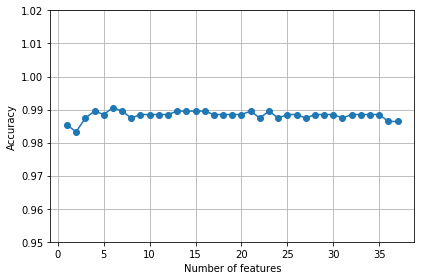

In [26]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=None,
                              random_state=1)
tree = tree.fit(X_train, y_train)


# selecting features
sbs = SBS(tree, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.95, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [27]:
k6 = list(sbs.subsets_[31])
print(data_new.columns[2:][k6])

Index(['WS/48', 'PER', 'W/L%', 'PTS', 'APG', 'TOPG'], dtype='object')


In [28]:
tree = tree.fit(X_train, y_train)
print('Training accuracy:', tree.score(X_train_std, y_train))
print('Test accuracy:', tree.score(X_test_std, y_test))

Training accuracy: 0.986136541982736
Test accuracy: 0.9807692307692307


In [29]:
from sklearn.metrics import confusion_matrix
test_pred = tree.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=test_pred)
print(confmat)

[[102   0]
 [  2   0]]


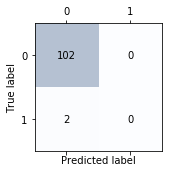

In [30]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [31]:
'''test_pred = tree.predict(X_test)
test_results = pd.DataFrame(data_new.loc[data_new['Season']==season,:].Player)
test_results['MVP'] = test_pred
test_results.sort_values('MVP',ascending=False)
'''

"test_pred = tree.predict(X_test)\ntest_results = pd.DataFrame(data_new.loc[data_new['Season']==season,:].Player)\ntest_results['MVP'] = test_pred\ntest_results.sort_values('MVP',ascending=False)\n"

In [32]:
test_pred = tree.predict(X_test)
test_results = pd.DataFrame(data_new.loc[data_new['Season']==season,:].Player)
test_results['MVP'] = test_pred
test_results=test_results['Player'][test_results['MVP']==1]
test_results

Series([], Name: Player, dtype: object)

# Random Forest Method

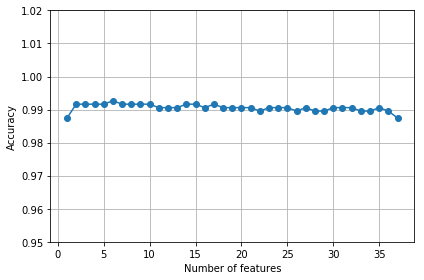

In [33]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=50, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
# selecting features

sbs = SBS(forest, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.95, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [34]:
k6 = list(sbs.subsets_[31])
print(data_new.columns[2:][k6])

Index(['VORP', 'BPM', 'PER', 'W/L%', 'OBPM', '2PA'], dtype='object')


In [35]:
forest = forest.fit(X_train, y_train)
print('Training accuracy:', forest.score(X_train_std, y_train))
print('Test accuracy:', forest.score(X_test_std, y_test))

Training accuracy: 0.986136541982736
Test accuracy: 0.9807692307692307


In [36]:
from sklearn.metrics import confusion_matrix
test_pred = forest.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=test_pred)
print(confmat)

[[102   0]
 [  2   0]]


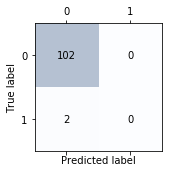

In [37]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [38]:
'''
test_pred = forest.predict(X_test)
test_results = pd.DataFrame(data_new.loc[data_new['Season']==season,:].Player)
test_results['MVP'] = test_pred
test_results.sort_values('MVP',ascending=False)
'''

"\ntest_pred = forest.predict(X_test)\ntest_results = pd.DataFrame(data_new.loc[data_new['Season']==season,:].Player)\ntest_results['MVP'] = test_pred\ntest_results.sort_values('MVP',ascending=False)\n"

In [39]:
test_pred = forest.predict(X_test)
test_results = pd.DataFrame(data_new.loc[data_new['Season']==season,:].Player)
test_results['MVP'] = test_pred
test_results=test_results['Player'][test_results['MVP']==1]
test_results

Series([], Name: Player, dtype: object)

# LinearSVC Method

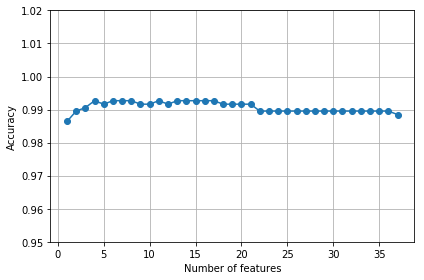

In [40]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)

# selecting features
sbs = SBS(clf, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.95, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [41]:
k5 = list(sbs.subsets_[32])
print(data_new.columns[2:][k5])

Index(['PER', 'W/L%', 'OWS', 'PTS', 'TOPG'], dtype='object')


In [42]:
clf = clf.fit(X_train, y_train)
print('Training accuracy:', clf.score(X_train_std, y_train))
print('Test accuracy:', clf.score(X_test_std, y_test))

Training accuracy: 0.5056238556107768
Test accuracy: 0.5


In [43]:
from sklearn.metrics import confusion_matrix
test_pred = clf.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=test_pred)
print(confmat)

[[101   1]
 [  0   2]]


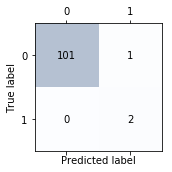

In [44]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [45]:
test_pred = clf.predict(X_test)
test_results = pd.DataFrame(data_new.loc[data_new['Season']==season,:].Player)
test_results['MVP'] = test_pred
test_results=test_results['Player'][test_results['MVP']==1]
test_results

3866         James Harden
3878         LeBron James
3922    Russell Westbrook
Name: Player, dtype: object

# SMOTE Model

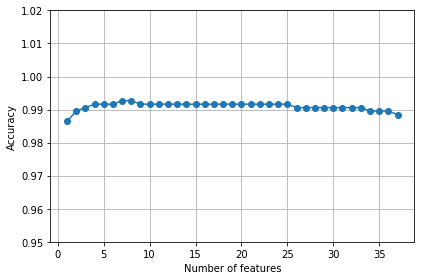

In [46]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_sample(X, y)
clf_smote = LinearSVC().fit(X_resampled, y_resampled)

# selecting features
sbs = SBS(clf_smote, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.95, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()


In [47]:
k4 = list(sbs.subsets_[33])
print(data_new.columns[2:][k4])

Index(['WS', 'W/L%', 'PPG', 'TOV'], dtype='object')


In [48]:
clf_smote = clf_smote.fit(X_train, y_train)
print('Training accuracy:', clf_smote.score(X_train_std, y_train))
print('Test accuracy:', clf_smote.score(X_test_std, y_test))

Training accuracy: 0.508239602406487
Test accuracy: 0.5


In [49]:
from sklearn.metrics import confusion_matrix
test_pred = clf_smote.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=test_pred)
print(confmat)

[[101   1]
 [  0   2]]


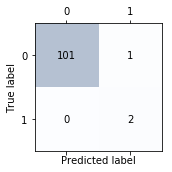

In [50]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [51]:
test_pred = clf_smote.predict(X_test)
test_results = pd.DataFrame(data_new.loc[data_new['Season']==season,:].Player)
test_results['MVP'] = test_pred
test_results=test_results['Player'][test_results['MVP']==1]
test_results

3866         James Harden
3878         LeBron James
3922    Russell Westbrook
Name: Player, dtype: object

# Bagging Method

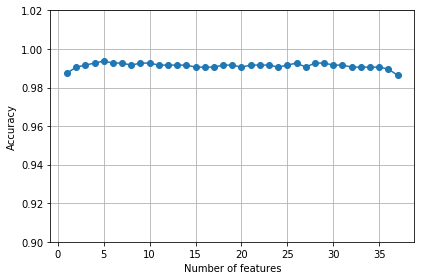

In [52]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=None,
                              random_state=1)

bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=25, 
                        max_samples=1.0, 
                        max_features=1.0, 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1)
bag = bag.fit(X_train, y_train)


# selecting features
sbs = SBS(bag, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.90, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [53]:
k5 = list(sbs.subsets_[-5])
print(data_new.columns[2:][k5])

Index(['VORP', 'WS/48', 'W/L%', 'PPG', 'AST%'], dtype='object')


In [54]:
bag = bag.fit(X_train, y_train)
print('Training accuracy:', bag.score(X_train_std, y_train))
print('Test accuracy:', bag.score(X_test_std, y_test))

Training accuracy: 0.986136541982736
Test accuracy: 0.9807692307692307


In [55]:
from sklearn.metrics import confusion_matrix
test_pred = bag.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=test_pred)
print(confmat)

[[102   0]
 [  2   0]]


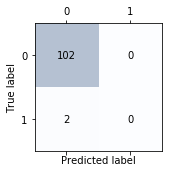

In [56]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=test_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=test_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=test_pred))



Precision: 0.000
Recall: 0.000
F1: 0.000


C:\Users\yipan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yipan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [58]:
test_pred = bag.predict(X_test)
test_results = pd.DataFrame(data_new.loc[data_new['Season']==season,:].Player)
test_results['MVP'] = test_pred
test_results=test_results['Player'][test_results['MVP']==1]
test_results

Series([], Name: Player, dtype: object)

# Conclusion

# Future Improvements